# Lifestyle & Wellbeing Data

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

%matplotlib inline

## Informations on dataset : 
Found on Kaggle : [Dataset Source](https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data)

Dataset was made from gathering answers of 12756 people on 23 different features from the "Your Work-Life balance score" survey ([link here](http://www.authentic-happiness.com/your-life-satisfaction-score)) based on the recent research published in the 360 living guide. 

##### This survey enlights 5 dimensions of professional/personal life balance experience : 
1. Healthy body
2. Healthy mind
3. Expertise (measuring the ability to grow your expertise and achieve something unique) 
4. Connection (strength of social network) 
5. Meaning (evaluating your compassion, generosity, how, much you are living the life of your dream) 




In [337]:
raw_df = pd.read_csv('Wellbeing_and_lifestyle_data.csv')

In [338]:
raw_df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,AGE,GENDER
0,7/7/15,3,2,2,5,0,5,2,0,1,...,0,7,5,5,1,4,0,5,36 to 50,Female
1,7/7/15,2,3,4,3,8,10,5,2,2,...,5,8,2,2,2,3,2,6,36 to 50,Female
2,7/7/15,2,3,3,4,4,10,3,2,2,...,5,8,10,2,2,4,8,3,36 to 50,Female
3,7/7/15,3,3,10,3,10,7,2,5,2,...,0,5,7,5,1,5,2,0,51 or more,Female
4,7/7/15,5,1,3,3,10,4,2,4,2,...,0,7,0,0,2,8,1,5,51 or more,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12751,2/23/2020 22:03:56,3,4,10,8,10,8,6,5,1,...,3,7,0,1,1,10,6,7,21 to 35,Female
12752,2/24/2020 2:44:30,3,3,6,5,2,5,1,0,2,...,0,7,0,0,2,3,0,2,36 to 50,Female
12753,2/24/2020 10:35:02,4,4,7,5,3,3,4,2,1,...,5,6,0,2,2,6,3,5,36 to 50,Female
12754,2/24/2020 12:54:10,3,3,10,4,8,10,3,3,1,...,1,6,0,1,1,10,1,10,21 to 35,Female


In [4]:
raw_df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'DAILY_MEDITATION', 'AGE', 'GENDER'],
      dtype='object')

In [70]:
raw_df.isna().sum()

Timestamp            0
FRUITS_VEGGIES       0
DAILY_STRESS         0
PLACES_VISITED       0
CORE_CIRCLE          0
SUPPORTING_OTHERS    0
SOCIAL_NETWORK       0
ACHIEVEMENT          0
DONATION             0
BMI_RANGE            0
TODO_COMPLETED       0
FLOW                 0
DAILY_STEPS          0
LIVE_VISION          0
SLEEP_HOURS          0
LOST_VACATION        0
DAILY_SHOUTING       0
SUFFICIENT_INCOME    0
PERSONAL_AWARDS      0
TIME_FOR_PASSION     0
DAILY_MEDITATION     0
AGE                  0
GENDER               0
dtype: int64

In [7]:
raw_df.shape

(12756, 23)

In [241]:
raw_df.GENDER.value_counts(normalize = True)

Female    0.604735
Male      0.395265
Name: GENDER, dtype: float64

In [9]:
raw_df.GENDER.value_counts()

Female    7714
Male      5042
Name: GENDER, dtype: int64

In [52]:
raw_df.AGE.value_counts()

21 to 35        4898
36 to 50        3608
51 or more      2688
Less than 20    1561
Name: AGE, dtype: int64

In [53]:
raw_df.AGE.value_counts(normalize = True)

21 to 35        0.384006
36 to 50        0.282869
51 or more      0.210741
Less than 20    0.122383
Name: AGE, dtype: float64

In [10]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12756 entries, 0 to 12755
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Timestamp          12756 non-null  object
 1   FRUITS_VEGGIES     12756 non-null  int64 
 2   DAILY_STRESS       12756 non-null  object
 3   PLACES_VISITED     12756 non-null  int64 
 4   CORE_CIRCLE        12756 non-null  int64 
 5   SUPPORTING_OTHERS  12756 non-null  int64 
 6   SOCIAL_NETWORK     12756 non-null  int64 
 7   ACHIEVEMENT        12756 non-null  int64 
 8   DONATION           12756 non-null  int64 
 9   BMI_RANGE          12756 non-null  int64 
 10  TODO_COMPLETED     12756 non-null  int64 
 11  FLOW               12756 non-null  int64 
 12  DAILY_STEPS        12756 non-null  int64 
 13  LIVE_VISION        12756 non-null  int64 
 14  SLEEP_HOURS        12756 non-null  int64 
 15  LOST_VACATION      12756 non-null  int64 
 16  DAILY_SHOUTING     12756 non-null  int64

In [339]:
raw_df.BMI_RANGE = np.where(raw_df.BMI_RANGE == 1, 0,1)

In [340]:
raw_df.SUFFICIENT_INCOME = np.where(raw_df.SUFFICIENT_INCOME == 1, 0,1)

In [341]:
raw_df.Timestamp = pd.to_datetime(raw_df.Timestamp)

In [245]:
raw_df.AGE.unique()

array(['36 to 50', '51 or more', '21 to 35', 'Less than 20'], dtype=object)

In [342]:
#Strange value in raw_df for DAILY_STRESS
raw_df.drop(raw_df.loc[raw_df.DAILY_STRESS == '1/1/00'].index, inplace = True)

In [343]:
raw_df.DAILY_STRESS = raw_df.DAILY_STRESS.astype('int64')

## DATA EXPLORATION

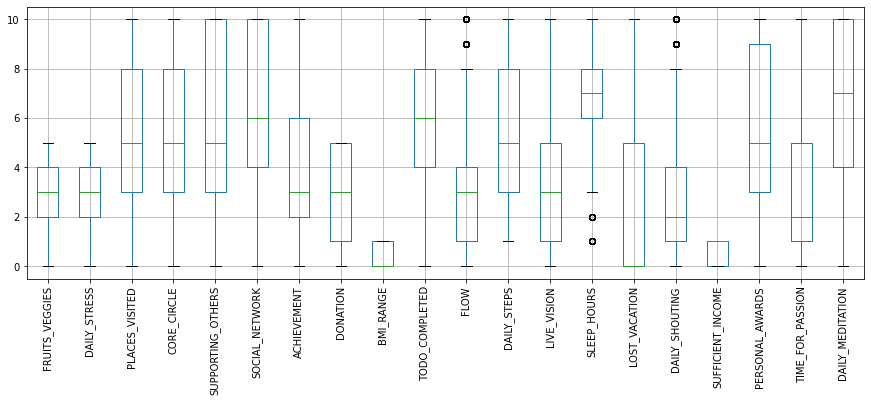

In [617]:
raw_df.boxplot(figsize=(15,5), rot=90)

In [363]:
#Looking at the first row
raw_df.loc[1]

FRUITS_VEGGIES        2
DAILY_STRESS          3
PLACES_VISITED        4
CORE_CIRCLE           3
SUPPORTING_OTHERS     8
SOCIAL_NETWORK       10
ACHIEVEMENT           5
DONATION              2
BMI_RANGE             1
TODO_COMPLETED        5
FLOW                  2
DAILY_STEPS           5
LIVE_VISION           5
SLEEP_HOURS           8
LOST_VACATION         2
DAILY_SHOUTING        2
SUFFICIENT_INCOME     1
PERSONAL_AWARDS       3
TIME_FOR_PASSION      2
DAILY_MEDITATION      6
Name: 1, dtype: int64

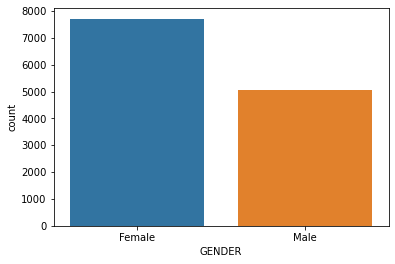

In [618]:
sns.countplot(raw_df.GENDER)

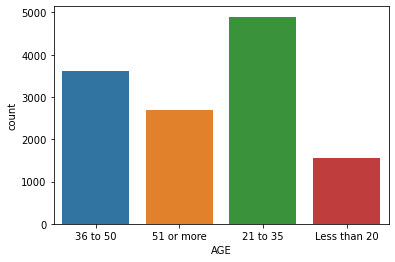

In [619]:
sns.countplot(raw_df.AGE)

In [620]:
raw_df.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION
count,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000,12755.000000
mean,2.930223,2.782673,5.339240,5.484908,5.577421,6.551156,3.963230,2.700745,0.400706,5.706233,3.126382,5.704822,3.712034,7.035202,2.832536,2.920659,0.728185,5.702626,3.266484,6.253156
std,1.452016,1.372733,3.313942,2.851533,3.262379,3.083890,2.752132,1.863895,0.490061,2.633368,2.334573,2.885452,3.244412,1.202201,3.671601,2.689803,0.444912,3.108526,2.721211,3.034866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,2.000000,1.000000,0.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,0.000000,3.000000,1.000000,4.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,0.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,1.000000,5.000000,2.000000,7.000000
75%,4.000000,4.000000,8.000000,8.000000,10.000000,10.000000,6.000000,5.000000,1.000000,8.000000,4.000000,8.000000,5.000000,8.000000,5.000000,4.000000,1.000000,9.000000,5.000000,10.000000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,10.000000,10.000000,10.000000


In [34]:
raw_df.Timestamp.dt.year.value_counts()

2016    3328
2017    2769
2019    2251
2015    2013
2018    1936
2020     459
Name: Timestamp, dtype: int64

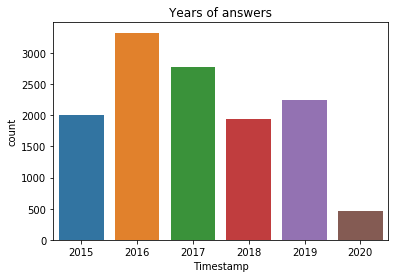

In [37]:
plt.title('Years of answers')
sns.countplot(raw_df.Timestamp.dt.year)

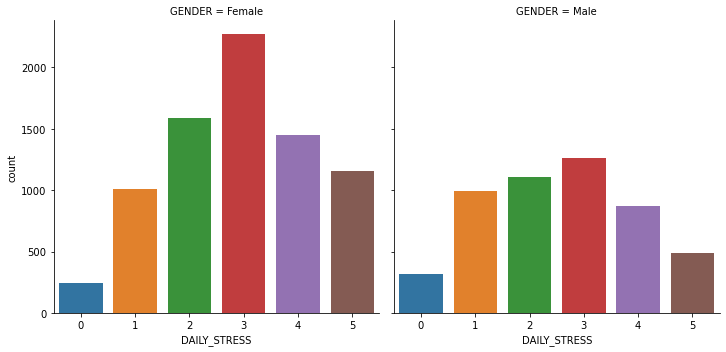

In [49]:
sns.catplot(x = 'DAILY_STRESS', col="GENDER", data = raw_df, kind='count')

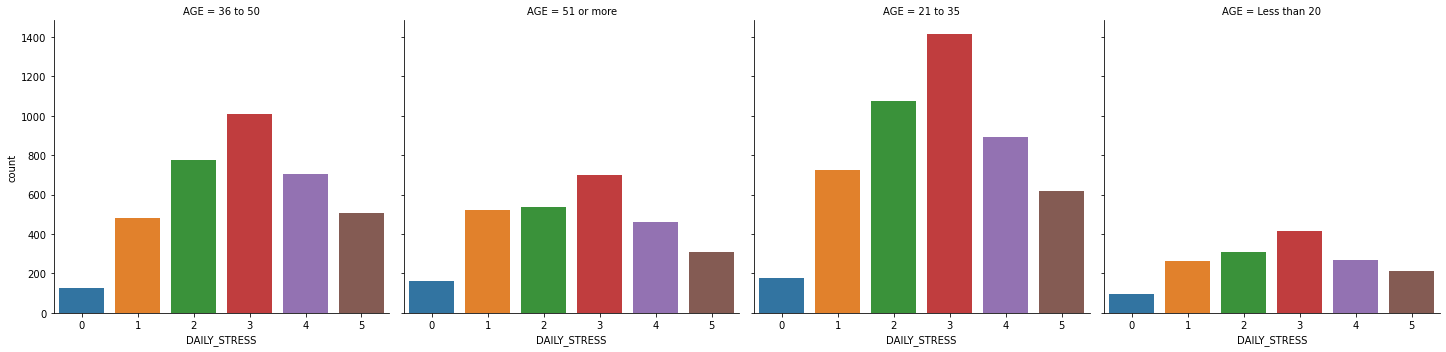

In [51]:
sns.catplot(x = 'DAILY_STRESS', col = 'AGE', data = raw_df, kind='count')

### Dummies

In [344]:
#Transform the age and gender columns into dummies
dummies_df = pd.get_dummies(raw_df[['GENDER', 'AGE']], prefix=['GENDER', 'AGE'], drop_first = True)

In [345]:
raw_df.drop(['Timestamp', 'GENDER', 'AGE'], axis=1, inplace=True)

#### Now we have a cleaner dataframe to work on :

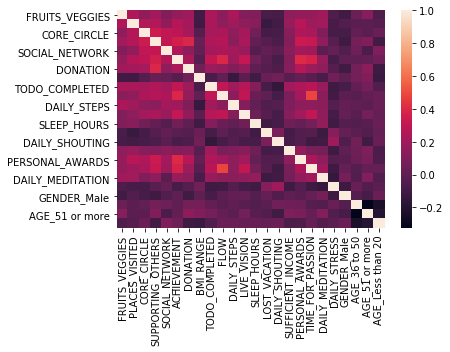

In [52]:
sns.heatmap(data=df.corr())

In [403]:
df.corr()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,...,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,DAILY_STRESS,GENDER_Male,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
FRUITS_VEGGIES,1.000000,0.248521,0.153614,0.207908,0.105831,0.166652,0.200794,-0.091937,0.230356,0.136239,...,-0.071101,0.151258,0.165587,0.171532,0.195067,-0.068186,-0.101748,0.039057,0.125598,-0.053888
PLACES_VISITED,0.248521,1.000000,0.260027,0.255018,0.157728,0.264932,0.212622,-0.103668,0.234081,0.154863,...,-0.089083,0.173347,0.279592,0.198310,0.203308,-0.098474,-0.039995,-0.004859,-0.012253,-0.028541
CORE_CIRCLE,0.153614,0.260027,1.000000,0.338628,0.304859,0.292492,0.220277,-0.025831,0.222432,0.243491,...,-0.076207,0.122592,0.250260,0.227561,0.103707,-0.093381,-0.077187,0.009020,-0.004482,0.035301
SUPPORTING_OTHERS,0.207908,0.255018,0.338628,1.000000,0.311311,0.359061,0.394246,0.027590,0.252195,0.266956,...,-0.064181,0.115801,0.333640,0.322819,0.149158,-0.028220,-0.107018,0.072757,0.105104,-0.090889
SOCIAL_NETWORK,0.105831,0.157728,0.304859,0.311311,1.000000,0.252535,0.147856,0.016990,0.212186,0.240474,...,-0.010240,0.131991,0.214812,0.202697,-0.006727,0.009942,-0.044677,0.049321,-0.055458,0.101630
ACHIEVEMENT,0.166652,0.264932,0.292492,0.359061,0.252535,1.000000,0.236619,-0.034213,0.309391,0.389587,...,-0.066316,0.117234,0.400318,0.374000,0.172787,-0.101242,-0.000236,0.002265,0.012342,0.050065
DONATION,0.200794,0.212622,0.220277,0.394246,0.147856,0.236619,1.000000,0.059698,0.189926,0.162083,...,-0.054699,0.124178,0.274375,0.188788,0.150506,-0.026715,-0.098484,0.065882,0.144281,-0.102634
BMI_RANGE,-0.091937,-0.103668,-0.025831,0.027590,0.016990,-0.034213,0.059698,1.000000,-0.067518,0.011722,...,0.054484,-0.014403,0.016337,-0.023936,-0.070886,0.060428,-0.003638,0.071452,0.106414,-0.120851
TODO_COMPLETED,0.230356,0.234081,0.222432,0.252195,0.212186,0.309391,0.189926,-0.067518,1.000000,0.302304,...,-0.145570,0.203418,0.249884,0.278042,0.181972,-0.132565,-0.077819,0.014638,0.071992,-0.041394
FLOW,0.136239,0.154863,0.243491,0.266956,0.240474,0.389587,0.162083,0.011722,0.302304,1.000000,...,-0.080179,0.086963,0.217949,0.482736,0.145928,-0.119583,-0.004752,-0.021673,0.013381,0.037032


In [101]:
##Need some good improvments ! 
def distplots(df):

    n=len(df.columns.tolist())

    if n %2 == 0:
        nr = int(n/6)
    else:
        nr = int((n+1)/6)
        
    titles = df.columns.tolist()

    fig, axes = plt.subplots(nrows=nr, ncols=4, figsize = (20,15))
    fig.suptitle('Distributions')
    for ax, tit,i in zip(axes.flat, titles, range(0,n)):
        sns.distplot(df.iloc[:,i], ax=ax)
        ax.set(title=tit)
    
    plt.tight_layout()
    return

In [93]:
n=len(df.columns.tolist())

In [91]:
n/6

4.0

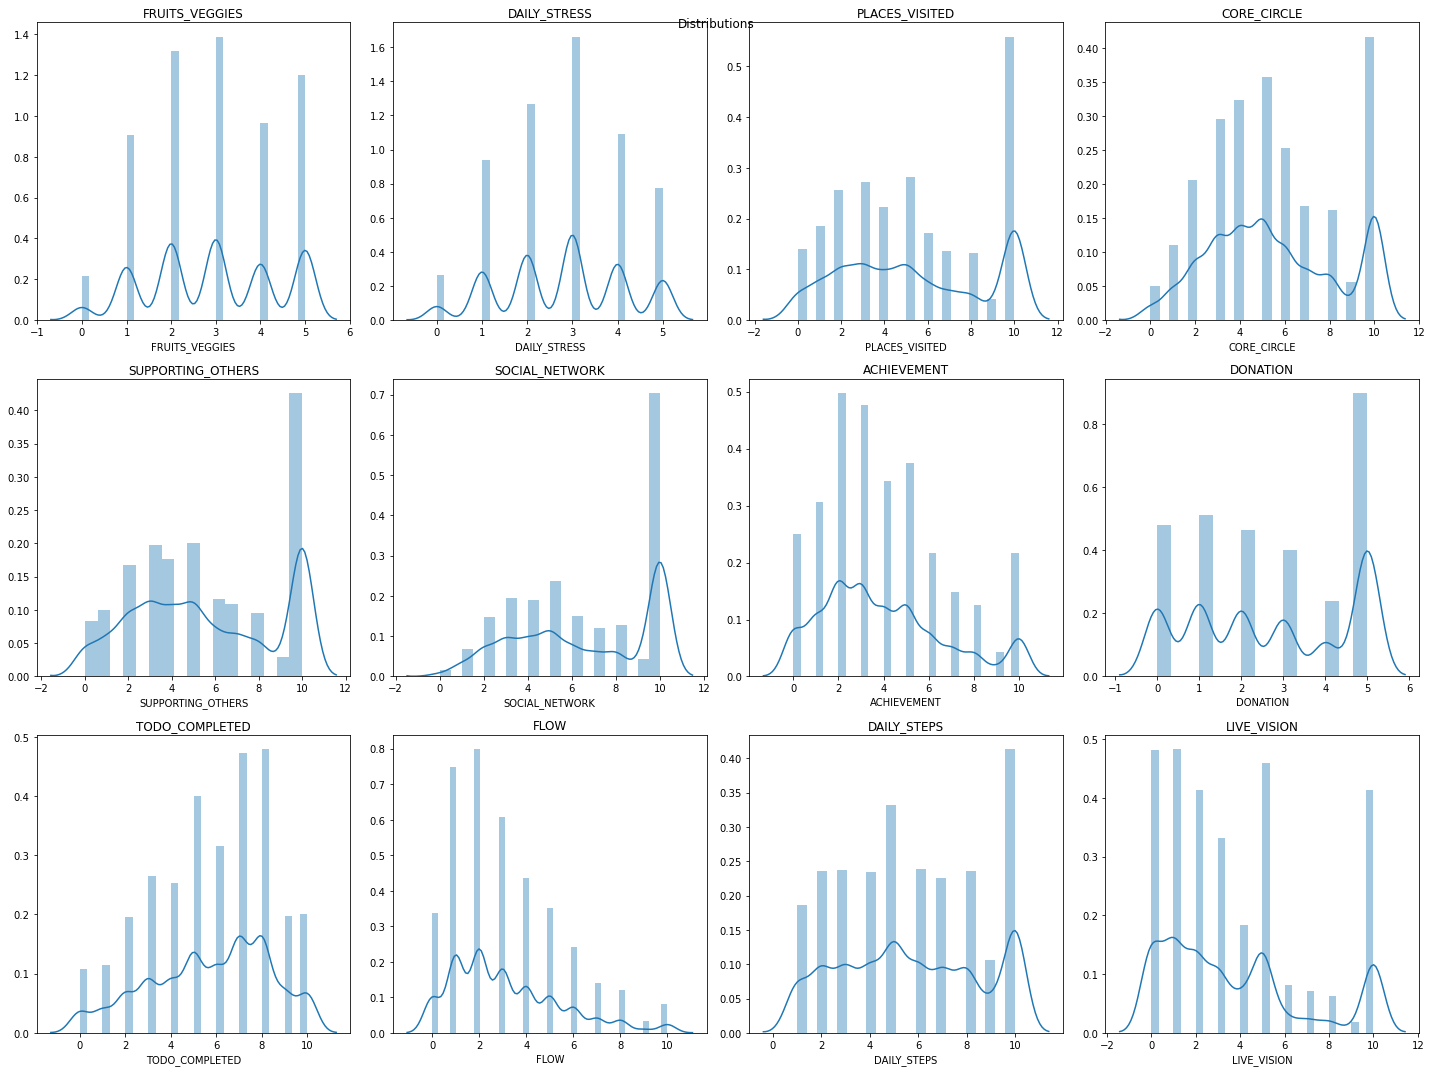

In [104]:
distplots(df.drop(['BMI_RANGE', 'SUFFICIENT_INCOME', 'AGE', 'GENDER'], axis = 1))

## DATA SCALING

In [346]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [347]:
scaler = StandardScaler()
scaler.fit(raw_df.drop('DAILY_STRESS', axis = 1))
df_scale = scaler.transform(raw_df.drop('DAILY_STRESS', axis = 1))
df_inverse = scaler.inverse_transform(df_scale)
df_scale = pd.concat([pd.DataFrame(df_scale, columns=raw_df.drop('DAILY_STRESS', axis=1).columns), raw_df.DAILY_STRESS], axis = 1)
df_inverse = pd.concat([pd.DataFrame(df_inverse, columns=raw_df.drop('DAILY_STRESS', axis=1).columns), raw_df.DAILY_STRESS], axis = 1)

In [348]:
df = pd.concat([df_scale, dummies_df], axis = 1)
df_inverse = pd.concat([df_inverse, dummies_df], axis = 1)

In [349]:
df.drop(df.loc[df.FRUITS_VEGGIES.isna() == True].index, inplace=True)
df_inverse.drop(df_inverse.loc[df_inverse.FRUITS_VEGGIES.isna() == True].index, inplace=True)

In [350]:
df.drop(df.loc[df.GENDER_Male.isna() == True].index, inplace=True)
df_inverse.drop(df_inverse.loc[df_inverse.GENDER_Male.isna() == True].index, inplace=True)

In [151]:
df.isna().sum()

FRUITS_VEGGIES       0
PLACES_VISITED       0
CORE_CIRCLE          0
SUPPORTING_OTHERS    0
SOCIAL_NETWORK       0
ACHIEVEMENT          0
DONATION             0
BMI_RANGE            0
TODO_COMPLETED       0
FLOW                 0
DAILY_STEPS          0
LIVE_VISION          0
SLEEP_HOURS          0
LOST_VACATION        0
DAILY_SHOUTING       0
SUFFICIENT_INCOME    0
PERSONAL_AWARDS      0
TIME_FOR_PASSION     0
DAILY_MEDITATION     0
DAILY_STRESS         0
GENDER_Male          0
AGE_36 to 50         0
AGE_51 or more       0
AGE_Less than 20     0
dtype: int64

In [173]:
df_inverse.shape

(12754, 24)

In [174]:
df.shape

(12754, 24)

In [354]:
df['DAILY_STRESS'] = np.where(df.DAILY_STRESS >= 3, 1, 0)

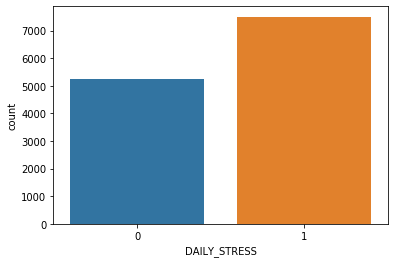

In [18]:
sns.countplot(df.DAILY_STRESS)

## Splitting Data

In [19]:
from sklearn.model_selection import train_test_split

In [355]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('DAILY_STRESS', axis = 1), df.DAILY_STRESS, test_size = 0.20, random_state = 42, stratify = df.DAILY_STRESS)

In [766]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [767]:
pred3 = logreg.predict(X_test)

In [768]:
confusion_matrix(y_test, pred3)

array([[ 463,  588],
       [ 303, 1197]], dtype=int64)

In [769]:
accuracy_score(y_test, pred3)

0.6507252058016464

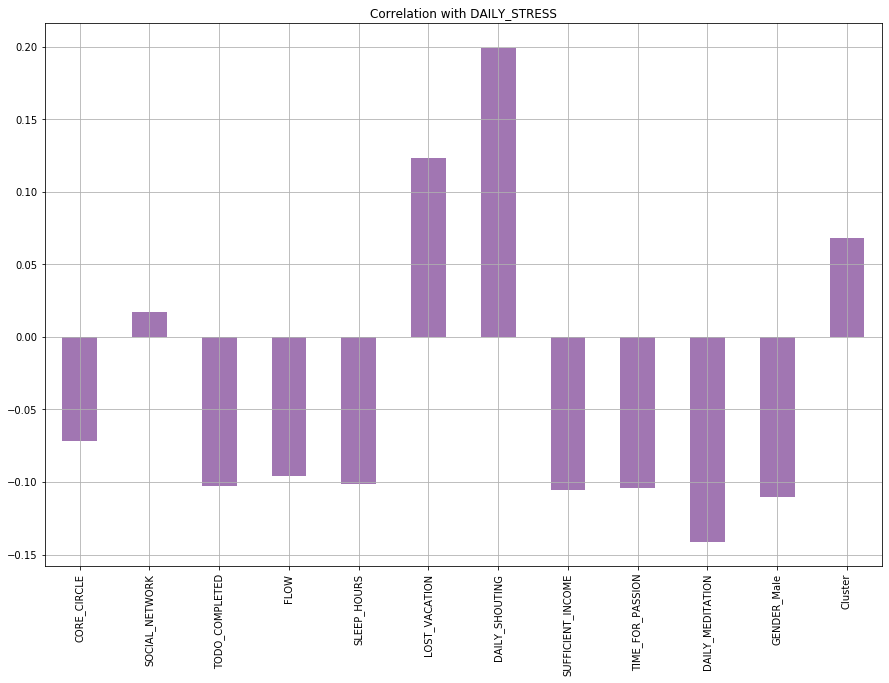

In [314]:
df_test.drop(['DAILY_STRESS', 'Full_Cluster'], axis=1).corrwith(df.DAILY_STRESS).plot.bar(figsize = (15, 10), title = "Correlation with DAILY_STRESS", fontsize = 10,grid = True, color=np.random.random(3) )

In [22]:
import xgboost as xgb

In [356]:
XG = xgb.XGBClassifier()
XG.fit(X_train,y_train)
predXG = predXG.round()
predXG = XG.predict(X_test)
confusion_matrix(y_test,predXG)

array([[ 474,  577],
       [ 323, 1177]], dtype=int64)

In [357]:
accuracy_score(y_test,predXG)

0.6471971775774206

In [358]:
recall_score(y_test, predXG)

0.7846666666666666

In [360]:
precision_score(y_test, predXG)

0.6710376282782212

In [361]:
f1_score(y_test, predXG)

0.723417332513829

## RFE to detect least significant columns

In [215]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [216]:
logreg = LogisticRegression(max_iter = 10000)
selector = RFE(logreg)
selector.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=10000,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=None, step=1, verbose=0)

In [217]:
X_train.columns[~selector.support_]

Index(['FRUITS_VEGGIES', 'PLACES_VISITED', 'SUPPORTING_OTHERS', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'DAILY_STEPS', 'LIVE_VISION',
       'PERSONAL_AWARDS', 'AGE_36 to 50', 'AGE_51 or more',
       'AGE_Less than 20'],
      dtype='object')

In [218]:
X_train.columns[selector.support_]

Index(['CORE_CIRCLE', 'SOCIAL_NETWORK', 'TODO_COMPLETED', 'FLOW',
       'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME',
       'TIME_FOR_PASSION', 'DAILY_MEDITATION', 'GENDER_Male'],
      dtype='object')

## CLUSTERS

### K_MEANS

In [236]:
from sklearn.decomposition import PCA
pca = PCA(0.85)
pca.fit(df[columns_to_cluster])

PCA(copy=True, iterated_power='auto', n_components=0.85, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [237]:
(pca.explained_variance_ratio_)

array([0.27809918, 0.1273203 , 0.10095815, 0.08886108, 0.08327202,
       0.07906985, 0.07221219, 0.06347891])

In [238]:
pca_df = pd.DataFrame(pca.transform(df[columns_to_cluster]), columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8'])

In [219]:
from sklearn.cluster import KMeans

In [220]:
columns_to_cluster = X_train.columns[~selector.support_].tolist()

In [253]:
df_clusters = KMeans(2) ## There is a way to decide the optimal number of clusters, but for now let's generate 5 clusters
df_clusters.fit(df[columns_to_cluster])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [254]:
df_clusters.labels_

array([1, 1, 1, ..., 1, 0, 1])

In [261]:
df['Cluster'] = (df_clusters.labels_)
df_inverse['Cluster'] = (df_clusters.labels_)

In [262]:
df.Cluster.unique()

array([1, 0])

In [257]:
df.Cluster.value_counts()

1    6377
0    6377
Name: Cluster, dtype: int64

In [258]:
df.groupby(['Cluster']).agg(lambda x: pd.Series.mode(x)[0])

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,...,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,DAILY_STRESS,GENDER_Male,AGE_36 to 50,AGE_51 or more,AGE_Less than 20,Full_Cluster
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.425506,1.406465,1.583453,1.355683,1.118386,0.376730,1.233624,-0.817697,0.871073,-0.482498,...,0.610964,1.382502,-0.465430,1.234648,1,0.0,0.0,0.0,0.0,1
1,-0.640668,-1.007673,-0.871463,-0.790074,1.118386,-0.713377,-1.449036,-0.817697,-0.268197,-0.910858,...,0.610964,-0.869458,-0.832928,1.234648,1,0.0,0.0,0.0,0.0,0


## Looking at the clusters

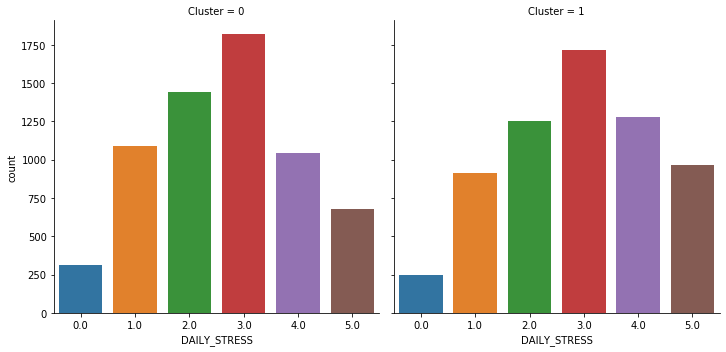

In [263]:
sns.catplot(x = 'DAILY_STRESS', col = 'Cluster', data = df_inverse, kind='count')

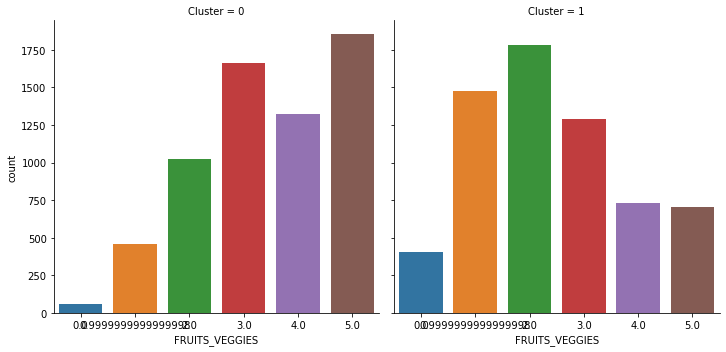

In [265]:
sns.catplot(x = 'FRUITS_VEGGIES', col = 'Cluster', data = df_inverse, kind='count')

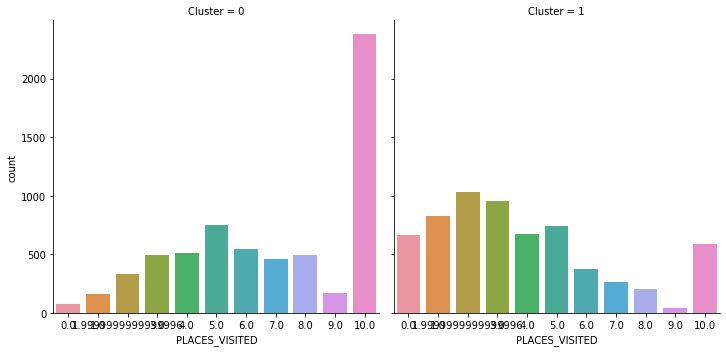

In [266]:
sns.catplot(x = 'PLACES_VISITED', col = 'Cluster', data = df_inverse, kind='count')

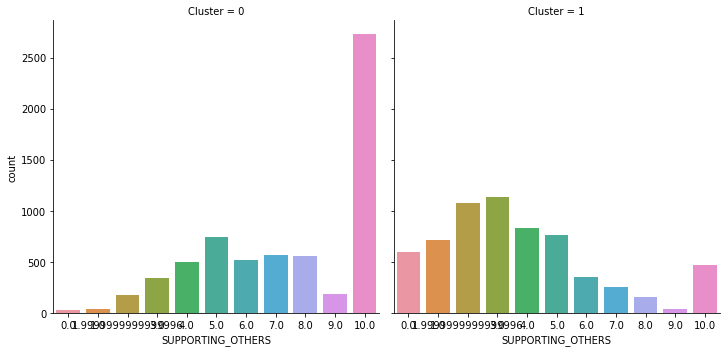

In [267]:
sns.catplot(x = 'SUPPORTING_OTHERS', col = 'Cluster', data = df_inverse, kind='count')

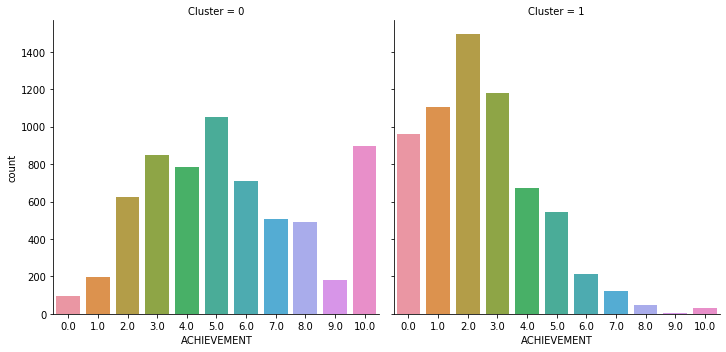

In [268]:
sns.catplot(x = 'ACHIEVEMENT', col = 'Cluster', data = df_inverse, kind='count')

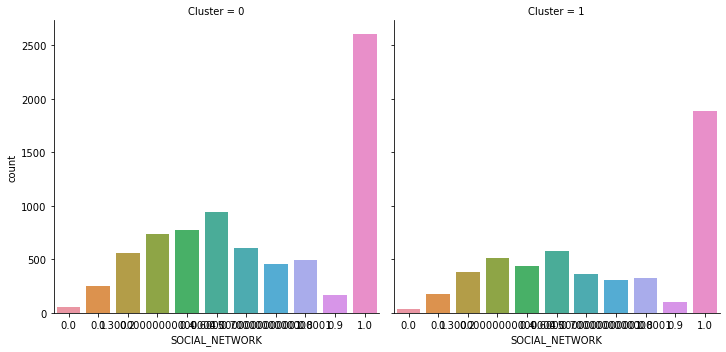

In [667]:
sns.catplot(x = 'SOCIAL_NETWORK', col = 'Cluster', data = df, kind='count')

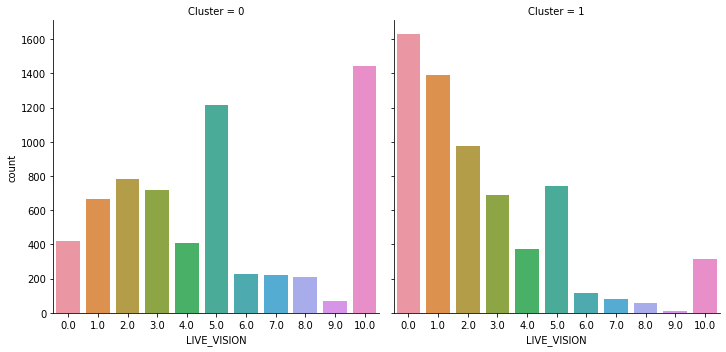

In [272]:
 sns.catplot(x = 'LIVE_VISION', col = 'Cluster', data = df_inverse, kind='count')

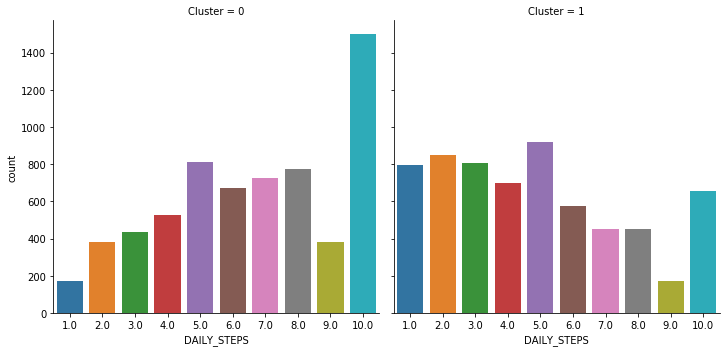

In [270]:
sns.catplot(x = 'DAILY_STEPS', col = 'Cluster', data = df_inverse, kind='count')

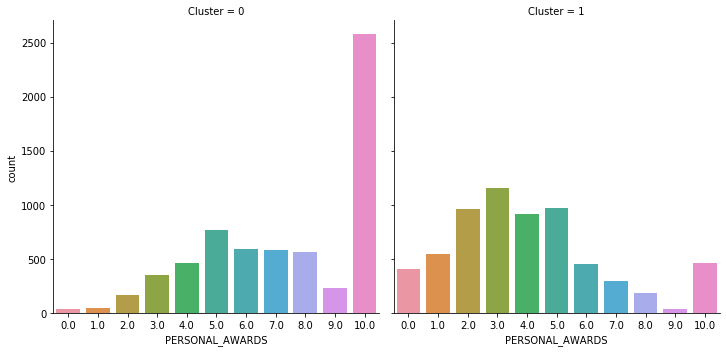

In [275]:
sns.catplot(x = 'PERSONAL_AWARDS', col = 'Cluster', data = df_inverse, kind='count')

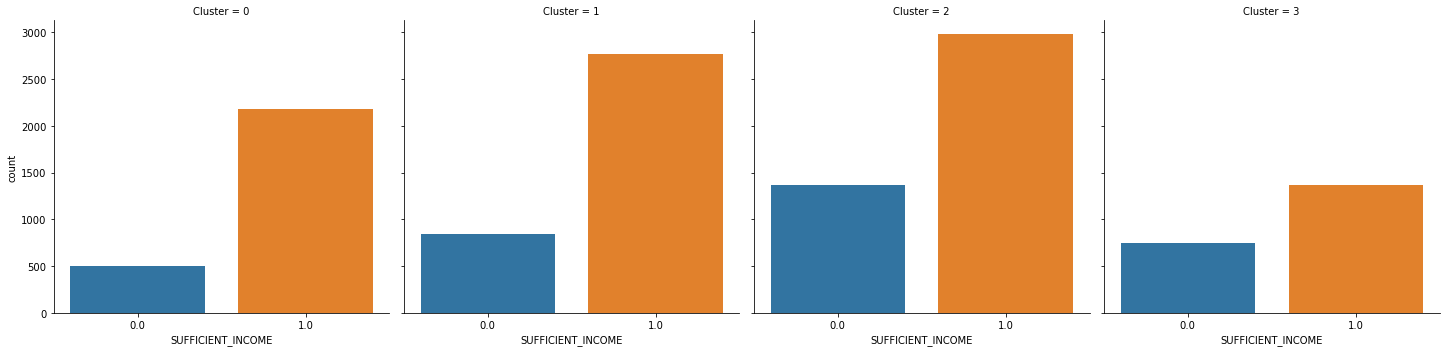

In [499]:
sns.catplot(x = 'SUFFICIENT_INCOME', col = 'Cluster', data = df, kind='count')

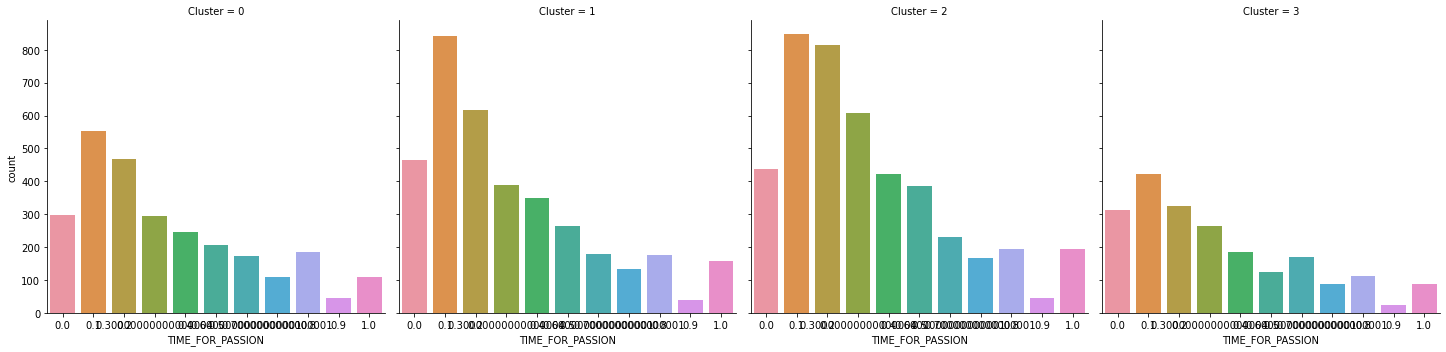

In [500]:
sns.catplot(x = 'TIME_FOR_PASSION', col = 'Cluster', data = df, kind='count')

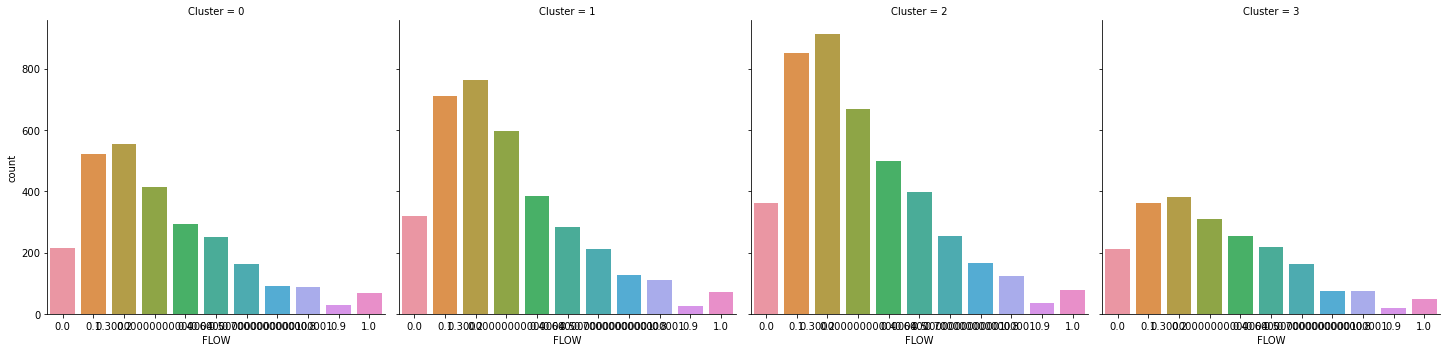

In [501]:
sns.catplot(x = 'FLOW', col = 'Cluster', data = df, kind='count')

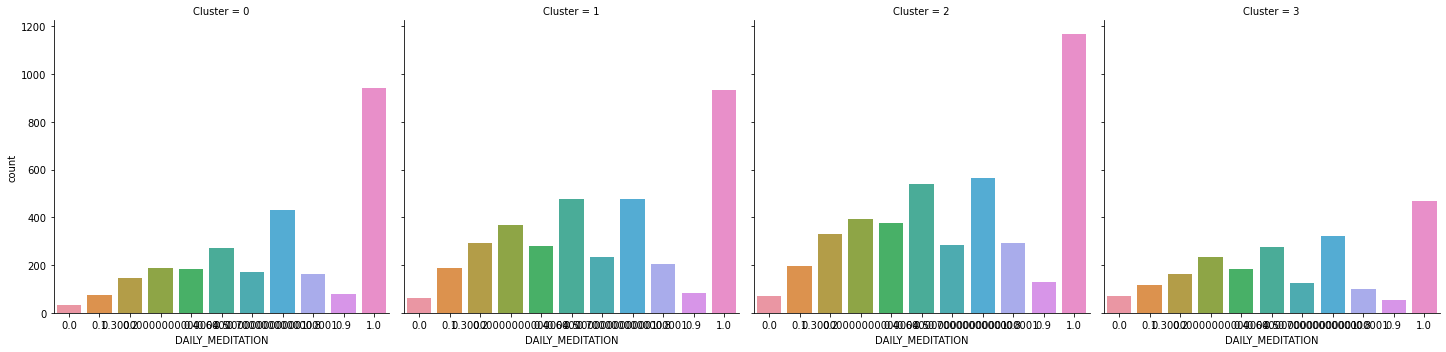

In [502]:
sns.catplot(x = 'DAILY_MEDITATION', col = 'Cluster', data = df, kind='count')

### Trying to determine the right k number for KMeans

In [312]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df[columns_to_cluster])
    Sum_of_squared_distances.append(km.inertia_)

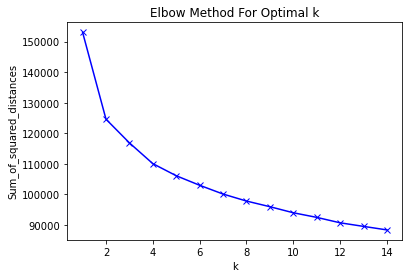

In [313]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### DBSCAN

In [514]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8).fit(df[columns_to_cluster])
df['cluster_DBSCAN']=dbscan.labels_

In [510]:
dbscan

DBSCAN(algorithm='auto', eps=1.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [515]:
df.cluster_DBSCAN.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, -1])

### PCA

In [670]:
from sklearn.decomposition import PCA
pca = PCA(0.70)
pca.fit(df[columns_to_cluster])

PCA(copy=True, iterated_power='auto', n_components=0.7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [671]:
(pca.explained_variance_ratio_)

array([0.181961  , 0.16923794, 0.16106833, 0.09367448, 0.06659303,
       0.06315149])

In [529]:
pca_df = pd.DataFrame(pca.transform(df[columns_to_cluster]), columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'])

In [530]:
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6
0,0.871435,-0.097887,-0.676325,-0.502011,-0.258682,0.032270
1,0.100477,0.799502,-0.533618,0.050962,-0.054549,0.258601
2,0.351451,0.829742,-0.491132,-0.024487,-0.034985,0.263430
3,-0.581086,0.549814,0.737709,-0.294288,0.145271,-0.549354
4,-0.457573,0.591687,0.773940,-0.383448,0.075536,-0.319504


In [538]:

df_clusters = KMeans(2) ## There is a way to decide the optimal number of clusters, but for now let's generate 5 clusters
df_clusters.fit(pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [539]:
df_clusters.labels_

array([1, 0, 0, ..., 1, 1, 1])

In [540]:
df['Cluster_PCA'] = (df_clusters.labels_)

In [541]:
df[df['Cluster_PCA']==0]

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,...,TIME_FOR_PASSION,DAILY_MEDITATION,DAILY_STRESS,GENDER_Male,AGE_36 to 50,AGE_51 or more,AGE_Less than 20,Cluster,cluster_DBSCAN,Cluster_PCA
1,0.4,0.4,0.3,0.8,1.0,0.5,0.4,1.0,0.5,0.2,...,0.2,0.6,3.0,0.0,1.0,0.0,0.0,1,1,0
2,0.4,0.3,0.4,0.4,1.0,0.3,0.4,1.0,0.2,0.2,...,0.8,0.3,3.0,0.0,1.0,0.0,0.0,1,1,0
3,0.6,1.0,0.3,1.0,0.7,0.2,1.0,1.0,0.3,0.5,...,0.2,0.0,3.0,0.0,0.0,1.0,0.0,0,2,0
4,1.0,0.3,0.3,1.0,0.4,0.2,0.8,1.0,0.5,0.0,...,0.1,0.5,1.0,0.0,0.0,1.0,0.0,0,2,0
6,0.8,1.0,0.6,1.0,1.0,0.3,1.0,1.0,0.8,0.8,...,0.8,1.0,2.0,1.0,0.0,1.0,0.0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12740,0.6,0.2,0.2,0.5,0.0,0.5,0.4,1.0,0.6,0.6,...,0.8,0.5,4.0,0.0,0.0,0.0,0.0,3,5,0
12745,0.6,0.5,1.0,0.7,1.0,0.3,0.4,1.0,0.6,0.6,...,0.5,0.5,1.0,0.0,1.0,0.0,0.0,1,1,0
12746,0.6,0.6,1.0,0.7,1.0,0.4,0.4,1.0,0.6,0.6,...,0.6,0.5,5.0,0.0,0.0,0.0,0.0,3,5,0
12747,0.6,0.6,1.0,0.8,0.8,0.4,0.4,1.0,0.6,0.6,...,0.6,0.5,4.0,0.0,0.0,0.0,0.0,3,5,0


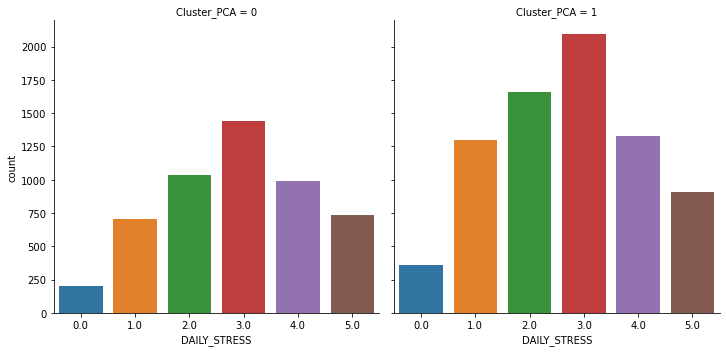

In [542]:
sns.catplot(x = 'DAILY_STRESS', col = 'Cluster_PCA', data = df, kind='count')

### Now, we will try to use the clusters in the classifier : 
1. Drop the columns used to perform the clusterization
2. Perform a classification to predict y (DAILY_STRESS)

In [276]:
df_test = df.drop(columns = columns_to_cluster)

In [327]:
X_train, X_test, y_train, y_test = train_test_split(df_test.drop('DAILY_STRESS', axis = 1), df_test.DAILY_STRESS, test_size = 0.20, random_state = 42, stratify = df_test.DAILY_STRESS)

In [453]:
df_test.loc[df_test.Cluster == 0]

,SOCIAL_NETWORK,FLOW,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,DAILY_MEDITATION,DAILY_STRESS,GENDER_Male,AGE_36 to 50,AGE_51 or more,AGE_Less than 20,Cluster
1,1.118386,-0.482498,0.802558,-0.226759,-0.342291,0.610964,-0.083419,3.0,0.0,1.0,0.0,0.0,0
2,1.118386,-0.482498,0.802558,1.952212,-0.342291,0.610964,-1.071969,3.0,0.0,1.0,0.0,0.0,0
3,0.145550,0.802584,-1.692963,1.135098,0.773076,-1.636757,-2.060520,3.0,0.0,0.0,1.0,0.0,0
4,-0.827285,-1.339219,-0.029282,-0.771502,-1.085869,0.610964,-0.412936,1.0,0.0,0.0,1.0,0.0,0
9,1.118386,-0.482498,-0.861123,-0.771502,-1.085869,-1.636757,-1.731003,4.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12737,-0.503007,1.230945,-0.029282,-0.771502,0.773076,-1.636757,-0.412936,5.0,1.0,1.0,0.0,0.0,0
12740,-2.124399,1.230945,-0.029282,0.317984,0.773076,0.610964,-0.412936,4.0,0.0,0.0,0.0,0.0,0
12745,1.118386,1.230945,-1.692963,0.590355,0.029498,-1.636757,-0.412936,1.0,0.0,1.0,0.0,0.0,0
12746,1.118386,1.230945,-1.692963,0.590355,0.029498,-1.636757,-0.412936,5.0,0.0,0.0,0.0,0.0,0


In [278]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)
pred = logreg.predict(X_test)

In [279]:
confusion_matrix(y_test, pred)

array([[ 464,  577],
       [ 307, 1203]], dtype=int64)

In [280]:
accuracy_score(y_test, pred)

0.653469227753822

In [334]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
pred2 = RF.predict(X_test)

In [335]:
confusion_matrix(y_test, pred2)

array([[ 516,  535],
       [ 333, 1167]], dtype=int64)

In [336]:
accuracy_score(y_test, pred2)

0.6597412779302234

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
pred2 = RF.predict(X_test)

In [284]:
from sklearn.ensemble import AdaBoostClassifier
model4 = AdaBoostClassifier()
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)

In [285]:
confusion_matrix(y_test, pred4)

array([[ 482,  559],
       [ 332, 1178]], dtype=int64)

In [286]:
accuracy_score(y_test, pred4)

0.6507252058016464

In [287]:
from sklearn.svm import NuSVC
model6 = NuSVC(nu=0.1)
model6.fit(X_train, y_train)
pred6 = model6.predict(X_test)

In [288]:
confusion_matrix(y_test, pred6)

array([[549, 492],
       [561, 949]], dtype=int64)

In [289]:
accuracy_score(y_test, pred6)

0.5872206977655822

In [290]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
pred7 = model1.predict(X_test)

In [291]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred7)

array([[523, 518],
       [518, 992]], dtype=int64)

In [292]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred7)

0.5938847510780086

In [328]:
XG = xgb.XGBClassifier()
XG.fit(X_train,y_train)
predXG = XG.predict(X_test)
confusion_matrix(y_test,predXG)

array([[ 493,  558],
       [ 300, 1200]], dtype=int64)

In [329]:
accuracy_score(y_test, predXG)

0.6636613092904743

In [330]:
from sklearn.metrics import precision_score
precision_score(y_test, predXG)

0.6825938566552902

In [331]:
from sklearn.metrics import recall_score
recall_score(y_test, predXG)

0.8

In [332]:
from sklearn.metrics import f1_score
f1_score(y_test, predXG)

0.736648250460405

In [333]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predXG))

              precision    recall  f1-score   support

           0       0.62      0.47      0.53      1051
           1       0.68      0.80      0.74      1500

    accuracy                           0.66      2551
   macro avg       0.65      0.63      0.64      2551
weighted avg       0.66      0.66      0.65      2551



### Cluster of the whole dataset

In [112]:
from sklearn.decomposition import PCA
pca = PCA(0.60)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=0.6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [113]:
(pca.explained_variance_ratio_)

array([0.1998128 , 0.09464697, 0.06163419, 0.052849  , 0.04939381,
       0.04413813, 0.04317081, 0.04147594, 0.04074228])

In [114]:
full_pca_df = pd.DataFrame(pca.transform(df), columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9'])

In [98]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

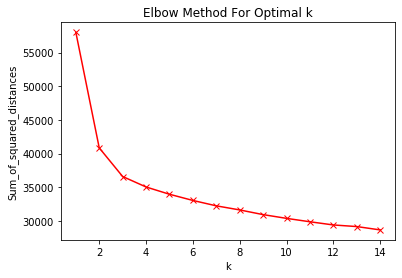

In [64]:
plt.plot(K, Sum_of_squared_distances, 'bx-', color = 'r')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [202]:
full_df_clusters = KMeans(2) ## There is a way to decide the optimal number of clusters, but for now let's generate 5 clusters
full_df_clusters.fit(full_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [203]:
full_df_clusters.labels_

array([0, 0, 0, ..., 0, 1, 0])

In [204]:
df['Full_Cluster'] = full_df_clusters.labels_

In [205]:
df_inverse['Full_Cluster'] = full_df_clusters.labels_

In [206]:
df.Full_Cluster.value_counts()

1    6383
0    6371
Name: Full_Cluster, dtype: int64

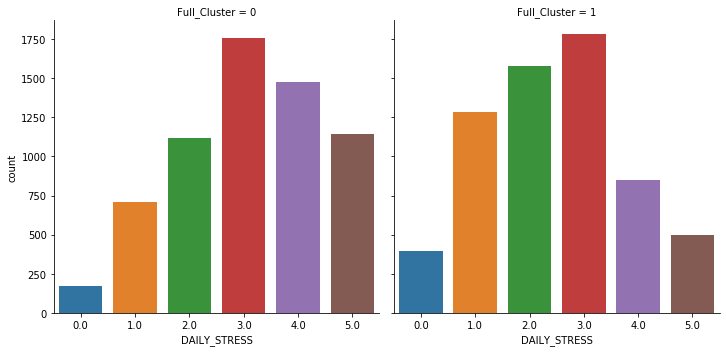

In [207]:
sns.catplot(x = 'DAILY_STRESS', col = 'Full_Cluster', data = df, kind='count')

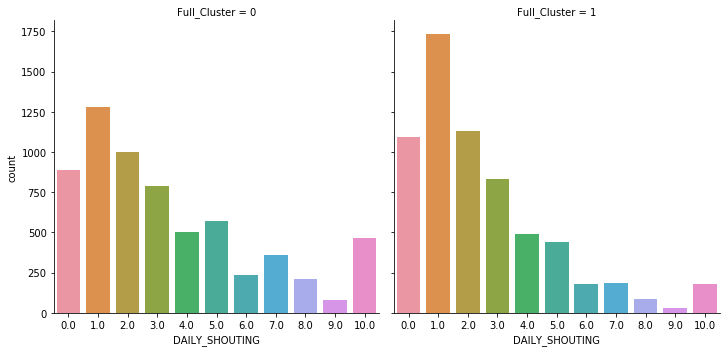

In [208]:
sns.catplot(x = 'DAILY_SHOUTING', col = 'Full_Cluster', data = df_inverse, kind='count')

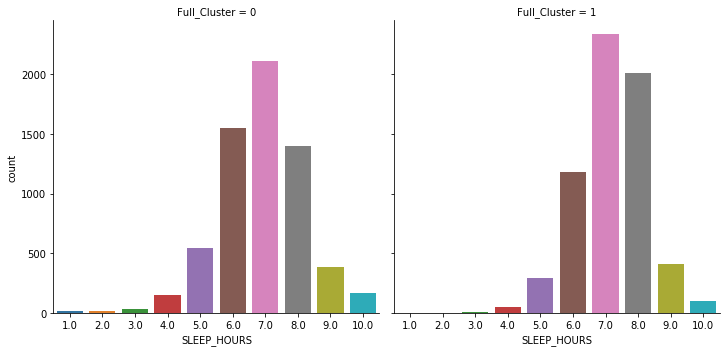

In [209]:
sns.catplot(x = 'SLEEP_HOURS', col = 'Full_Cluster', data = df_inverse, kind='count')

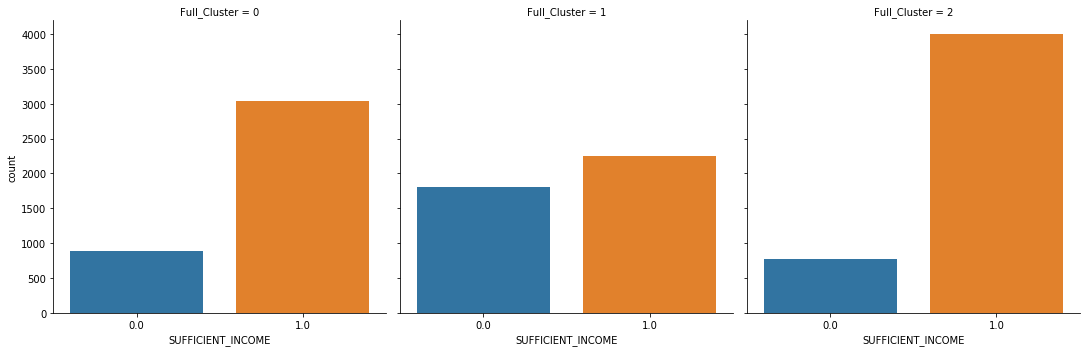

In [188]:
sns.catplot(x = 'SUFFICIENT_INCOME', col = 'Full_Cluster', data = df_inverse, kind='count')

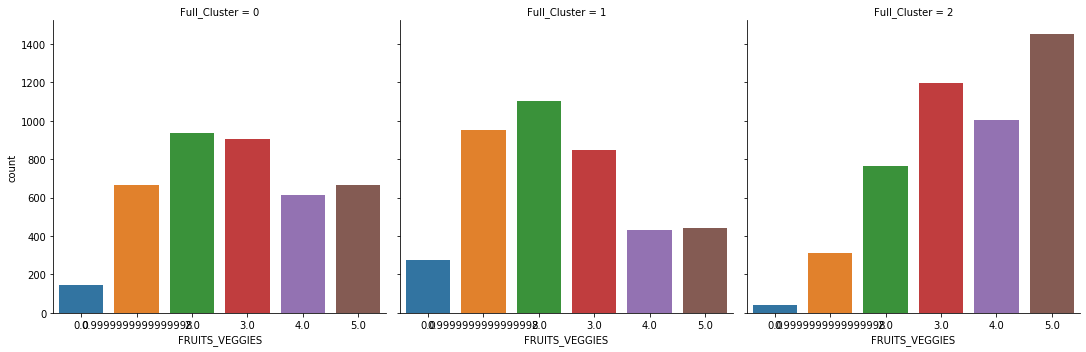

In [195]:
sns.catplot(x = 'FRUITS_VEGGIES', col = 'Full_Cluster', data = df_inverse, kind='count')

In [189]:
df_inverse.groupby(['Full_Cluster']).agg(lambda x: pd.Series.mode(x)[0])

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,...,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,DAILY_MEDITATION,DAILY_STRESS,GENDER_Male,AGE_36 to 50,AGE_51 or more,AGE_Less than 20
Full_Cluster,,,,,,,,,,,,,,,,,,,,,
0,2.0,10.0,5.0,3.0,10.0,2.0,0.0,0.0,7.0,2.0,...,1.0,1.0,5.0,1.0,10.0,2.0,0.0,0.0,0.0,0.0
1,2.0,2.0,3.0,3.0,10.0,2.0,0.0,0.0,5.0,1.0,...,1.0,1.0,3.0,1.0,10.0,4.0,0.0,0.0,0.0,0.0
2,5.0,10.0,10.0,10.0,10.0,10.0,5.0,0.0,8.0,3.0,...,1.0,1.0,10.0,2.0,10.0,3.0,0.0,0.0,0.0,0.0
